# 梯度下降算法

## 梯度下降思想

- 梯度下降是给定一个函数，找到这个函数的最小值点的方法或者算法：（最小值比较常用：比如损失最小）
    1. 两个操作
        1. 使用导数作为下降方向；
        2. 用户定义一个因子作为梯度下降的速度；
    2. 反复执行操作，可以接近最小值

## 梯度下降的例子

- 求如下函数的极小值
    - $f(x) = x^2 - 2x + 1 = (x-1)^2$
    - 最小值点在$x=1$

### 使用numpy实现梯度下降

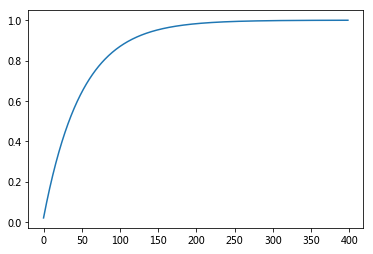

In [9]:
import numpy as np
x = 0  # 最小值点的初始值：肯定不正确，迭代后应该接近1
learn_rate = 0.01   # 学习率，控制梯度的下降速度
grad_fn = lambda x: 2 * x - 2    # 导数函数

epoch = 400  # 梯度下降的迭代次数

x_list = []

for epoch in range(epoch):
    x_grad = grad_fn(x)      # 计算导数 ( 梯度 )
    x -= x_grad * learn_rate          # 迭代梯度
    
    x_list.append(x)

# 可视化最小值点逼近过程
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(epoch), x_list[0:-1])
plt.show()


### 使用torch实现梯度下降

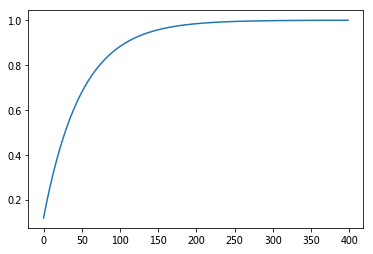

In [22]:
import torch 

x = torch.Tensor([0.1])  # 最小值点的初始值：肯定不正确，迭代后应该接近1
x.requires_grad=True

learn_rate = 0.01   # 学习率，控制梯度的下降速度


epoch = 400  # 梯度下降的迭代次数

x_list = []

for epoch in range(epoch):
    y = x ** 2 - 2 * x + 1
    y.backward(retain_graph=True)   # 反复计算梯度
#     print(x.grad)
    with torch.autograd.no_grad():   #
        x -= learn_rate * x.grad     # 直接修改就不允许做数据运算，否则会被跟踪计算历史
        x_list.append(x.detach().clone().numpy())    # 防止公用数据区
        x.grad.zero_()

# 可视化最小值点逼近过程
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(epoch), x_list[0:-1])
plt.show()



# 线性回归实现

## 线性回归模型

### 预测输出模型

- $y=xW$    
    - 其中:     
        - $x=(x_1,x_2,\dots,x_n,1)$    
        - $W^T=(w_1,w_2,\dots,w_n,b)$



### 损失模型

- 通用表示模型：$J(W)=\dfrac{1}{2}\sum\limits_{i=1}^{m}(x^{(i)}W-y^{(i)})^2$      
- 矩阵内积表示模型： $J(W)=\dfrac{1}{2}(XW-Y)^T(XW-Y)$  ，其中
    - $X=\pmatrix{x^{(1)}\\x^{(2)}\\\vdots\\x^{(m)}}$，$Y=\pmatrix{y^{(1)}\\y^{(2)}\\\vdots\\y^{(m)}}$     

### Torch实现

- 使用一个身高与年龄的数据集，训练出他们之间的线性关系，这个数据集是一元的线性关系。

#### 数据集

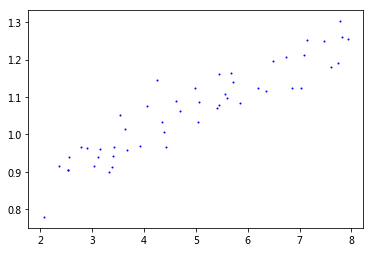

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

age = np.loadtxt("datasets/ex2x.dat")   # age：年龄
height = np.loadtxt("datasets/ex2y.dat")   # height：身高

plt.scatter(age, height, color=(0, 0, 1, 1), s=1**2)
plt.show()

#### forward模型表示
- 不考虑偏置项：$y = xW$
- 考虑偏置项：$y = xW + b$  

In [115]:
import torch

# 随机权重系数
w = torch.randn(1, 1, dtype=torch.float64)
# 随机偏置项
b = torch.randn(1, dtype=torch.float64)

# 把前面加载的numpy数据集转换为Tensor（注意shape）
x = torch.from_numpy(np.mat(age).T)   
y = torch.from_numpy(np.mat(height).T)
# forward的输出模型
y_ = x @ w + b


#### 损失模型表示

- $J(W)=\dfrac{1}{2}\sum\limits_{i=1}^{m}(x^{(i)}W-y^{(i)})^2$     

In [117]:
loss = torch.mean((y - y_) ** 2)    #  上面的是平方和，没有使用平均值，这里采用平均值方式
print(loss)

tensor(40.6979, dtype=torch.float64)


#### 损失最小值求解：梯度下降

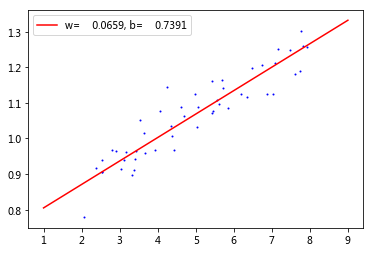

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch

# 1. 数据集加载------------------
age = np.loadtxt("datasets/ex2x.dat")   # age：年龄
height = np.loadtxt("datasets/ex2y.dat")   # height：身高
# 把前面加载的numpy数据集转换为Tensor（注意shape）
x = torch.from_numpy(np.mat(age).T)   
y = torch.from_numpy(np.mat(height).T)

# 2. 模型构建-------------------
# 随机权重系数
w = torch.tensor([[0]], dtype=torch.float64)
w.requires_grad = True
# 随机偏置项
b = torch.tensor([0], dtype=torch.float64)
b.requires_grad = True

# 3. 梯度下降迭代，求解最小值
epoch = 10000  # 反复梯度下降
learn_rate = 0.001  # 学习率（控制梯度下降速度）

list_loss = []
for e in range(epoch):
    # forward的输出模型
    y_ = x @ w + b
    # 损失模型
    loss = torch.mean((y- y_) ** 2)
    list_loss.append(loss)   # 保存损失函数
    # backward梯度模型
    loss.backward()  # 不需要保留图，因为整个计算模型每轮循环都是重新构建的。
    # w与b的梯度
    w.data -= learn_rate * w.grad.data
    b.data -= learn_rate * b.grad.data
    with torch.autograd.no_grad():   #
            w -= learn_rate * w.grad     # 直接修改就不允许做数据运算，否则会被跟踪计算历史
            w.grad.zero_()
            b -= learn_rate * b.grad     # 直接修改就不允许做数据运算，否则会被跟踪计算历史
            b.grad.zero_()

# 使用矩阵求解的结果（sklearn的模块计算的结果）
# w： [0.06388117]
# b： 0.7501625370012386

# 4. 可视化
x_p = torch.linspace(1, 9, 100, dtype=torch.float64)
y_p = x_p.view(x_p.shape[0], 1) @ w + b

plt.scatter(age, height, color=(0, 0, 1, 1), s=1**2)
plt.plot(
    x_p.detach().numpy(), y_p.detach().numpy(), color=(1, 0, 0, 1), 
    label=F"w={w.detach().numpy()[0,0]:10.4f}, b={b.detach().numpy()[0]:10.4f}")
plt.legend()
plt.show()

# 附录

## Tensor形状不一致导致的误差

- 当在计算均方差，如果需要的两个张量形状不一致，计算的值会产生误差，因为某些时候，张量的差运算尽管要求形状一致，但实际形状不一致的时候，也会计算，但是计算规则被改变，从而导致计算结果的差异。
- 下面是一个例子说明

In [118]:
import torch

v1 = torch.Tensor([
    [1],[2],[3]
])

v2 = torch.Tensor([1,2,3])

print(torch.mean((v1-v1)**2))    # 正确
print(torch.mean((v1-v2)**2))   # 错误（形状不一致，导致的误差）

tensor(0.)
tensor(1.3333)


In [119]:
import torch

v1 = torch.Tensor([
    [1],[2],[3]
])

v2 = torch.Tensor([1,2,3])

print(v1-v2)   # 形状不一致，计算出来的结果是这样的，所以在torch中形状不一致的运算，一定要小心。

tensor([[ 0., -1., -2.],
        [ 1.,  0., -1.],
        [ 2.,  1.,  0.]])


----